<img src="https://drive.google.com/uc?export=view&id=1ulQviLAnsnBLrWSQs3vXuTUsAI0vloz-" width="100%">

# Modelamiento y Evaluación
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

## **1. Tipo de Modelamiento**
---

Seleccione el tipo de modelo que puede usar para dar respuesta al problema de NLP. Recuerde que dispone de modelos que incluyen:

- **Regresión**: se busca estimar un valor continúo a partir de los textos.
- **Clasificación**: permite estimar un valor categórico a partir de los textos.
- **Agrupamiento**: permite encontrar grupos de documentos similares.
- **Modelos de tópicos**: permite encontrar temas/tópicos dentro del corpus e interpretarlo.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas desde NLP. Puede utilizar modelos pre-enternados con el fin de dar una solución.

Justifique la selección del modelo.

---**INGRESE SU RESPUESTA**---
De acuerdo a las reuniones en la empresa con el equipo, escogimos para la solución propuesta el uso no de un modelo específico, sino que realice utilización de tres tipos de modelamiento. 


*   En primer lugar hacer clasificación sobre los diferentes skills que se obtendran de los profiles en el proceso obtención de textos hasta su caracterización
*   El segundo tipo se realizará Agrupamiento para la obtención de los profiles similares y poder establecer patrones usados en su creación
*   Y como ultimo el modelado de tópicos, para poder encontrar y establecer los diferentes topicos a usar.

Como lo indique en Campuswire, el acceso al repositorio en el cual se esta generando este análisis y donde se ha trabajado con la extracción de los textos desde archivos pdf, docx, xls y que tienen ligado una base de datos de MongoDB, no me lo habilitaron el día de hoy por cuestiones de mantenimiento y actualización, para poder hacer la exportación de la data para este analisis y el respectivo pipeline que estamos usando. 
Por lo que me vi forzado a realizarlo a partir de un archivo de kaggle que tiene similitud al que estamos opteniendo al momento de importar el summary del profile luego de la extracción del texto a través de una Azure function.

Por este motivo para esta entrega solo realizare el modelamiento utilizando la opción 2 haciendo un agrupamiento de documentos similares sobre el corpus.

## **2. Implementación del modelo**
---

A continuación encuentra los pasos que puede seguir para la implementación de un modelo:

In [3]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 8.6 MB/s eta 0:00:00


### **2.1. Importar Modelo**
---

Seleccione la librería de NLP que utilizará para el modelo e impórtelo:

In [4]:
# ---**INGRESE SU CÓDIGO**---
import re
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
# Modelo a usar KMeans

### **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo:

In [8]:
# ---**INGRESE SU CÓDIGO**---
data = pd.read_csv('/content/UpdatedResumeDataSet_.csv', delimiter=",")
data.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [11]:
clean_data = data.dropna()
complete_corpus = list(clean_data['Resume'])
corpus = complete_corpus[::50]
nlp = spacy.blank("en")

In [12]:
def preprocess(text):
    doc = nlp(text) # creamos un documento de spacy
    no_stops = " ".join(
        token.text
        for token in filter(
            lambda token: not token.is_stop and len(token) > 3 and len(token) < 24,
            doc,
            )
        ) # eliminamos stopwords y palabras por longitud
    norm_text = unidecode(no_stops.lower()) # normalizamos el texto
    no_chars = re.sub(r"[^a-z ]", " ", norm_text) # eliminamos caracteres especiales
    no_spaces = re.sub(r"\s+", " ", no_chars) # eliminamos espacios duplicados
    return no_spaces.strip()

In [20]:
data = data.assign(
        resume = data.Resume.apply(preprocess)  
)      

In [21]:
display(data.head())

,Category,Resume,norm_text,text,resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,skills programming languages python pandas num...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details rgpv data scientist data sci...,education details rgpv data scientist data sci...,education details rgpv data scientist data sci...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,areas interest deep learning control system de...,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills python hana tableau hana hana lumira li...,skills python hana tableau hana hana lumira li...,skills python hana tableau hana hana lumira li...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details ymcaust faridabad haryana da...,education details ymcaust faridabad haryana da...,education details ymcaust faridabad haryana da...


## **3. Evaluación o Aplicación del modelo**
---

Si entrenó un modelo, recuerde que debe reportar el desempeño del mismo sobre un conjunto de datos no visto (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin.
- **Tópicos**: perplexity, score de coherencia.

In [22]:
# ---**INGRESE SU CÓDIGO**---
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(sublinear_tf=True, min_df=5).fit(data.resume)
features = vect.transform(data.resume).toarray()
display(features.shape)

(962, 4989)

In [23]:
from sklearn.decomposition import PCA
reductor = PCA(n_components=0.95).fit(features)
reduced_features = reductor.transform(features)
display(reduced_features.shape)

(962, 135)

Adicionalmente, si utilizó un modelo pre-entrenado, debe generar predicciones y mostrar el resultado final de la aplicación del modelo sobre sus datos:

In [24]:
# ---**INGRESE SU CÓDIGO**---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_range = np.arange(2, 11, 1)

In [25]:
best_score = -1 
metrics = [] 
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0).fit(reduced_features) 
    score = silhouette_score(
        reduced_features,
        model.predict(reduced_features)
        ) 
    metrics.append(score)
    if score > best_score: 
        best_score = score 
        best_model = model 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

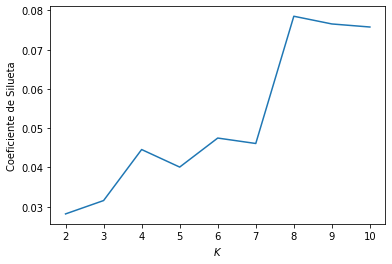

In [26]:
fig, ax = plt.subplots()
ax.plot(k_range, metrics)
ax.set_xlabel("$K$")
ax.set_ylabel("Coeficiente de Silueta")
ax.set_xticks(k_range)
fig.show()

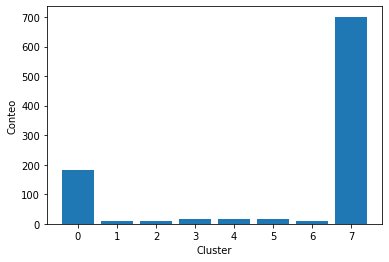

In [27]:
clusters = best_model.predict(reduced_features)
cats, counts = np.unique(clusters, return_counts=True)
fig, ax = plt.subplots()
ax.bar(cats, counts)
ax.set_xlabel("Cluster")
ax.set_ylabel("Conteo")
fig.show()

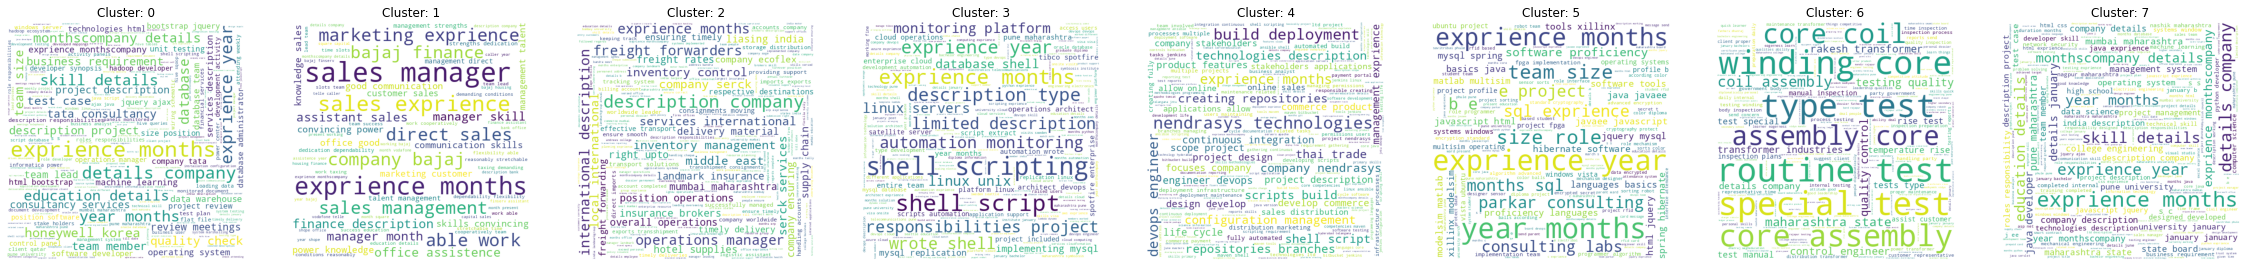

In [30]:
from wordcloud import WordCloud
predictions = pd.DataFrame({"text": data.resume, "cluster": clusters})
grouped_texts = (
        predictions
        .groupby("cluster")
        .agg({"text": lambda series: " ".join(series)})
        .reset_index()
        )
fig, axes = plt.subplots(
    1,
    best_model.n_clusters,
    figsize=(5 * best_model.n_clusters, 5),
    )
for cluster in range(best_model.n_clusters):
    ax = axes[cluster]
    ax.set_title(f"Cluster: {cluster}")
    text = grouped_texts.loc[grouped_texts.cluster == cluster, "text"].iloc[0]
    wc = WordCloud(
        background_color="#FFFFFF",
        width=500,
        height=500
        ).generate(text)
    ax.imshow(wc)
    ax.axis("off")
fig.show()

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*